# <span style="color:green">__Data Science Bootcamp__

## <span style="color:black">__Project__: Machine Learning Project

---
### <span style="color:navy">__Context__

<span style="color:dark_grey">

## Kickstarter Project Success

Analyse and model success factors of kickstarter campaigns. Give new projects an idea what is needed for a successful funding and potentially even predict campaign success upfront.
In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative.

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

**Source:** Kickstarter Project Success Data, containing information about their campaigns.

**Final Deliverables:**
1. Slide deck PDF pushed to GitHub designed for non-technical stakeholders that outline findings, recommendations, and future work (10 min presentation).
2. Jupyter notebook following PEP8 designed for data science/technical audience.
3. (Recommended) Python script for generating (takes .csv as argument and saves the model locally) and running your model from the terminal (takes test.csv and model as arguments and outputs accuracy and predictions as .csv) (you can still use the template repo : https://github.com/neuefische/ds-ml-project-template)

**Technical:**
* hh


---
### <span style="color:navy">__Importing Packages and Data__


In [238]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timezone
import json

# Libraries for data import
import os
import glob

# Preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import fbeta_score, make_scorer


# Define a plotting style to be used for all plots in this notebook
plt.style.use('tableau-colorblind10')

In [239]:
# Kickstarter data

path = "data/data-2"
all_files = glob.glob(os.path.join(path + "/*.csv"))
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
data = pd.concat(li, axis=0, ignore_index=True)

data.to_csv('data/csv_files_combined.csv',index=False)


In [240]:
df = pd.read_csv('data/csv_files_combined.csv')

In [241]:
# Formatting the columns
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 200)

# pd.set_option('display.max_colwidth', None)


---
### <span style="color:navy">__Exploratory Data Analysis__

In [242]:
#Print the shape of the data
print('Kickstarter dataset')
print('==================')
print('# observations: {}'.format(df.shape[0]))
print('# features:     {}'.format(df.shape[1]-1))

Kickstarter dataset
# observations: 209222
# features:     36


In [243]:
df.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.000000,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.000000,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.000000,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,NaN,1.308394,10000.0,596091328,NaN,False,NaN,1484245376,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,NaN,"{""key"":""assets/015/091/198/216fbf1bdc3739e7971...",136.0,"{""id"":2825329,""project_id"":2825329,""state"":""in...",the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,NaN,1.000000,2800.0,998516049,NaN,False,NaN,1355171527,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,NaN,"{""key"":""assets/011/457/844/37ba63d35fefaba76e9...",2820.0,"{""id"":417385,""project_id"":417385,""state"":""inac...",help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


In [244]:
df.category[0]

'{"id":266,"name":"Footwear","slug":"fashion/footwear","position":5,"parent_id":9,"color":16752598,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/fashion/footwear"}}}'

In [245]:
df.shape

(209222, 37)

In [246]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

In [248]:
df.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05
mean,145.419057,1.289290e+04,1.456089e+09,1.463033e+09,0.994857,4.917604e+04,1.073222e+09,1.460206e+09,1.881403e+04,1.462838e+09,1.010757,1.289213e+04
std,885.967976,8.889414e+04,6.339711e+07,6.305618e+07,0.211654,1.179427e+06,6.198051e+08,6.309029e+07,3.229596e+05,6.290421e+07,0.231893,8.890124e+04
min,0.000000,0.000000e+00,1.240366e+09,1.241334e+09,0.008966,1.000000e-02,8.624000e+03,1.240603e+09,0.000000e+00,1.241334e+09,0.008771,0.000000e+00
25%,4.000000,1.060000e+02,1.413317e+09,1.420607e+09,1.000000,1.500000e+03,5.351054e+08,1.417639e+09,1.100000e+02,1.420485e+09,1.000000,1.060014e+02
50%,27.000000,1.537000e+03,1.457895e+09,1.464754e+09,1.000000,5.000000e+03,1.074579e+09,1.461924e+09,1.556000e+03,1.464709e+09,1.000000,1.537358e+03
75%,89.000000,6.548000e+03,1.511595e+09,1.519437e+09,1.000000,1.500000e+04,1.609369e+09,1.516694e+09,6.887200e+03,1.519366e+09,1.000000,6.550000e+03
max,105857.000000,8.596474e+06,1.552527e+09,1.557721e+09,1.876033,1.000000e+08,2.147476e+09,1.552537e+09,8.103074e+07,1.552537e+09,1.716408,8.596475e+06


> Relevant columns in JSON format were separated, their features were concatenated to the main data frame and some irrelevant columns were dropped.

json plan:
* first explode json columns category and location
* select columns that we want to keep from json dataframes categroy and location
* concat selected columns to original dataframe
* delete all columns we dont want (including original json columns)

In [249]:
def explode_json(df, col_name):
    
    exploded = pd.json_normalize(df[col_name].apply(json.loads))
    return exploded

empty_json = '{"id":"nan","name":"nan","slug":"nan","short_name":"nan","displayable_name":"nan","localized_name":"nan","country":"nan","state":"nan","type":"nan","is_root":"nan","urls":{"web":{"discover":"nan","location":"nan"},"api":{"nearby_projects":"nan"}}}'

df['location'] = df['location'].fillna(empty_json)
df_location_exploded = explode_json(df, 'location')
df_category_exploded = explode_json(df, 'category')

# split slug column by "/"
df_category_exploded[['slug_1','slug_2']] = df_category_exploded['slug'].str.split('\/',expand=True)

# select location columns to keep
df_location_exploded_keep = df_location_exploded[['country', 'state','localized_name','type']]

# select category columns to keep
df_category_exploded_keep = df_category_exploded[['position','slug_1','slug_2']]

# concat
df = pd.concat([df,df_location_exploded_keep,df_category_exploded_keep], axis=1)

In [250]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'country',
       'state', 'localized_name', 'type', 'position', 'slug_1', 'slug_2'],
      dtype='object')

In [251]:
df.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,country,state,localized_name,type,position,slug_1,slug_2
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.000000,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international,US,CA,Novato,Town,5,fashion,footwear
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.000000,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic,US,TX,Euless,Town,4,games,playing cards
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.000000,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international,US,CA,Hollywood,Suburb,17,music,rock
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,NaN,1.308394,10000.0,596091328,NaN,False,NaN,1484245376,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,NaN,"{""key"":""assets/015/091/198/216fbf1bdc3739e7971...",136.0,"{""id"":2825329,""project_id"":2825329,""state"":""in...",the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic,LT,Kaunas County,Kaunas,Town,4,games,playing cards
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,NaN,1.000000,2800.0,998516049,NaN,False,NaN,1355171527,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,NaN,"{""key"":""assets/011/457/844/37ba63d35fefaba76e9...",2820.0,"{""id"":417385,""project_id"":417385,""state"":""inac...",help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/

In [252]:
df = df.drop(['blurb', 'category', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'fx_rate', 'id', 'location', 'name', 'photo', 'profile', 'source_url', 'urls'], axis=1)


In [253]:
df.columns

Index(['backers_count', 'converted_pledged_amount', 'country', 'created_at',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'goal', 'is_backing', 'is_starrable', 'is_starred', 'launched_at',
       'permissions', 'pledged', 'slug', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_pledged', 'usd_type',
       'country', 'state', 'localized_name', 'type', 'position', 'slug_1',
       'slug_2'],
      dtype='object')

---
### <span style="color:navy">__Data Cleaning and Adjustments__

**STEP 1** -> Data frame was checked to identify possible duplicated rows in the data frame and it showed that there were no duplicates to be cleaned.

In [254]:
# Identify duplicates
df.duplicated().value_counts() # no duplicates

False    197523
True      11699
dtype: int64

**STEP 2** -> A missing entries analysis using the package "missingno" was necessary before further corrections could be done. Below the missing entries were identified by column to be further handled.

In [255]:
# Identify missing values
df.isna().sum()

backers_count                    0
converted_pledged_amount         0
country                          0
created_at                       0
current_currency                 0
deadline                         0
disable_communication            0
friends                     208922
goal                             0
is_backing                  208922
is_starrable                     0
is_starred                  208922
launched_at                      0
permissions                 208922
pledged                          0
slug                             0
spotlight                        0
staff_pick                       0
state                            0
state_changed_at                 0
static_usd_rate                  0
usd_pledged                      0
usd_type                       480
country                          0
state                           63
localized_name                   0
type                             0
position                         0
slug_1              

<AxesSubplot:>

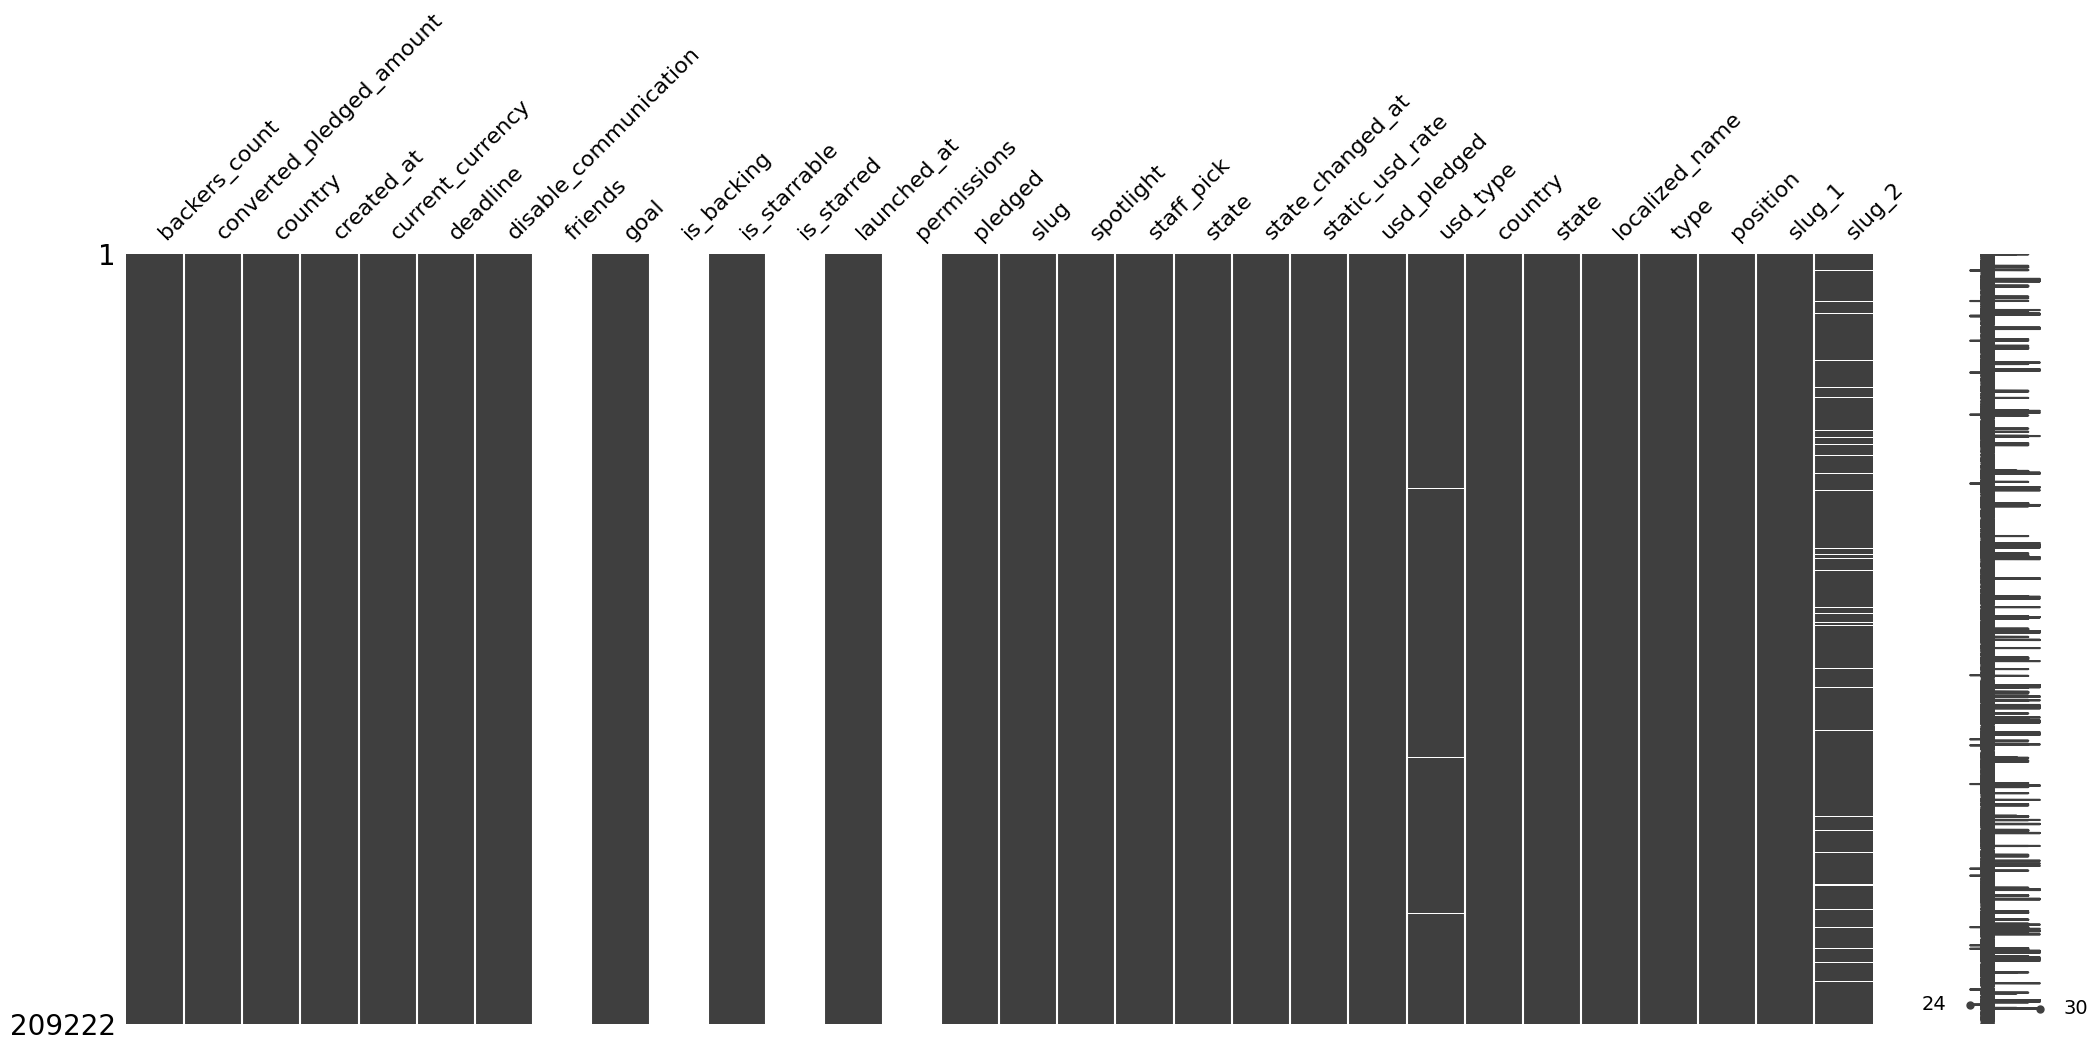

In [256]:
msno.matrix(df)

Blank columns were deleted as below:

In [257]:
df = df.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis=1)

In [258]:
df.columns

Index(['backers_count', 'converted_pledged_amount', 'country', 'created_at',
       'current_currency', 'deadline', 'disable_communication', 'goal',
       'is_starrable', 'launched_at', 'pledged', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_pledged', 'usd_type', 'country', 'state', 'localized_name', 'type',
       'position', 'slug_1', 'slug_2'],
      dtype='object')

<AxesSubplot:>

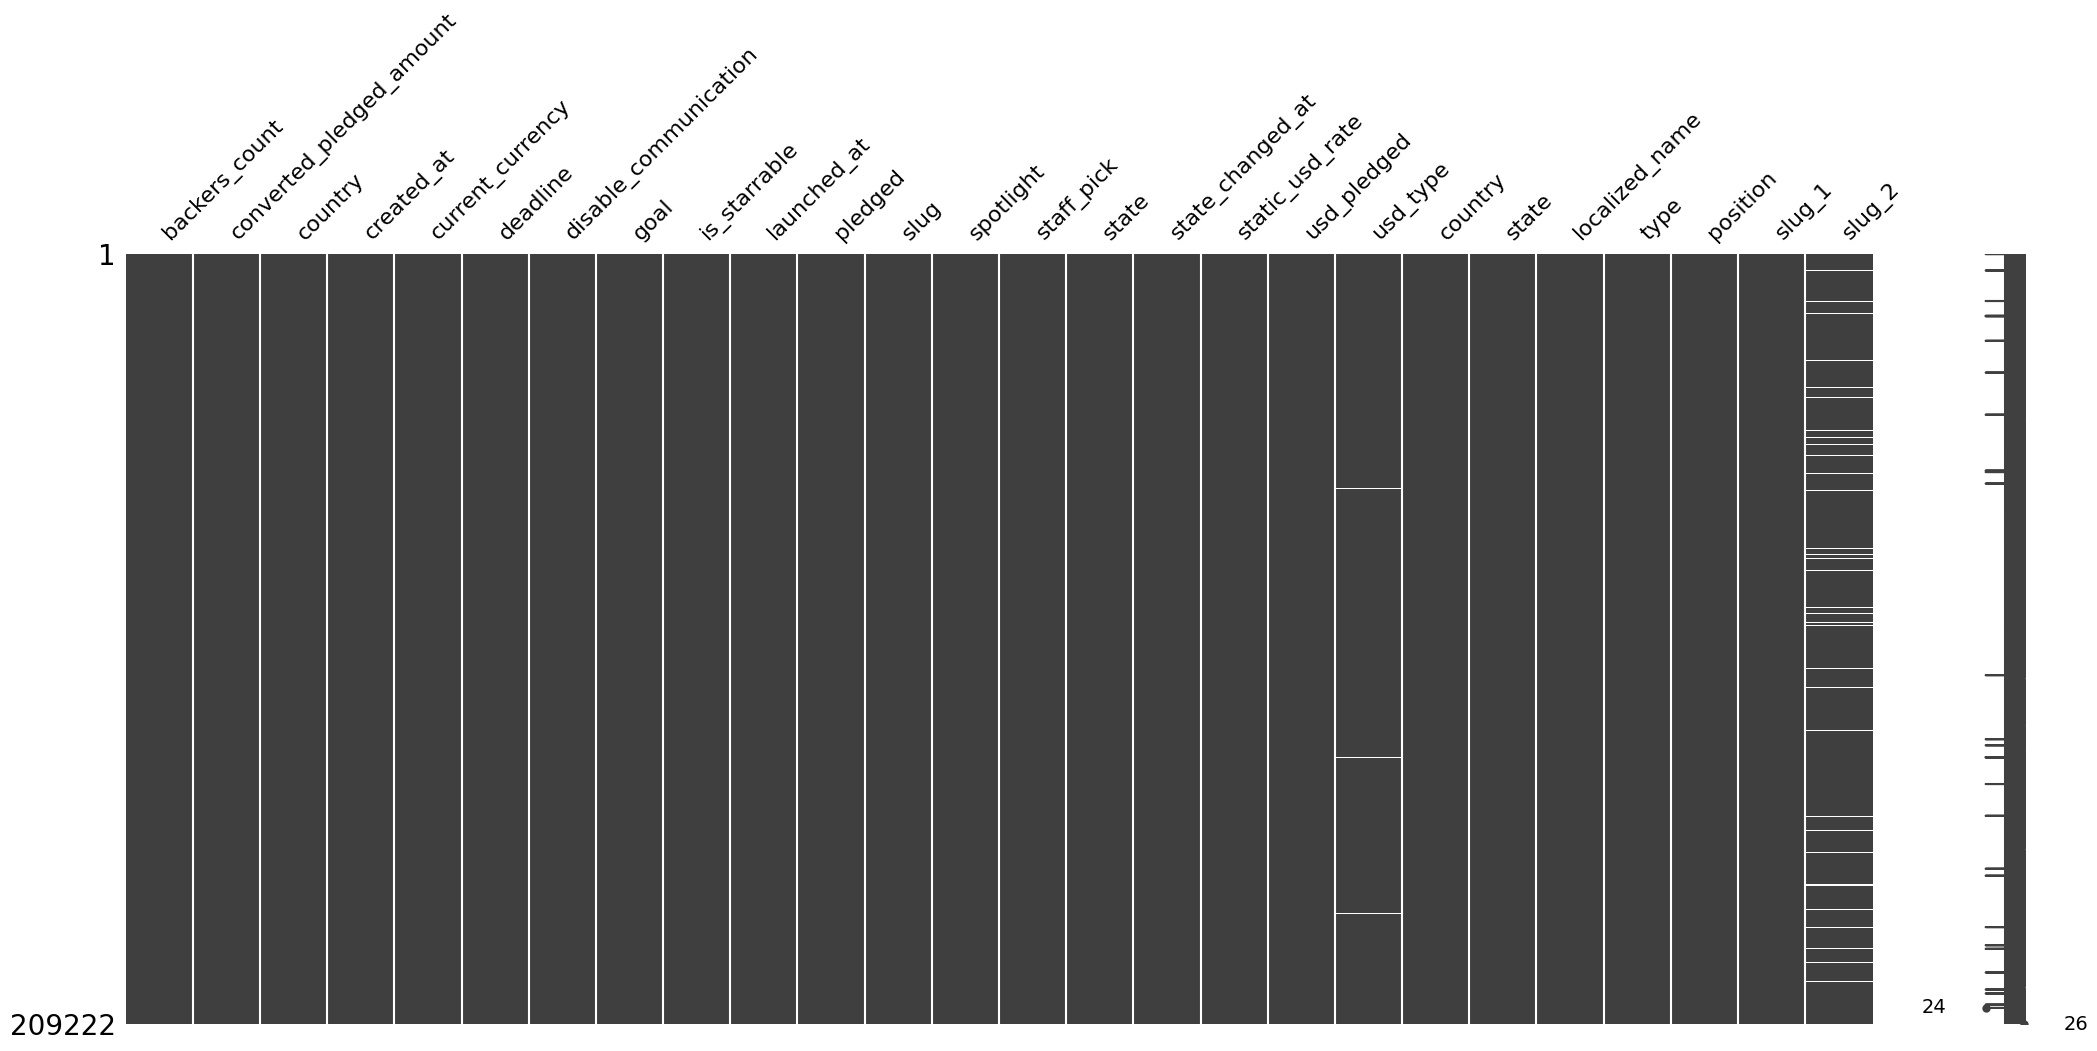

In [259]:
msno.matrix(df)

In [260]:
df.isna().sum()

backers_count                  0
converted_pledged_amount       0
country                        0
created_at                     0
current_currency               0
deadline                       0
disable_communication          0
goal                           0
is_starrable                   0
launched_at                    0
pledged                        0
slug                           0
spotlight                      0
staff_pick                     0
state                          0
state_changed_at               0
static_usd_rate                0
usd_pledged                    0
usd_type                     480
country                        0
state                         63
localized_name                 0
type                           0
position                       0
slug_1                         0
slug_2                      9041
dtype: int64

In [261]:
df[['usd_type', 'state']] = df[['usd_type', 'state']].fillna('unknown')
df.isna().sum()

backers_count                  0
converted_pledged_amount       0
country                        0
created_at                     0
current_currency               0
deadline                       0
disable_communication          0
goal                           0
is_starrable                   0
launched_at                    0
pledged                        0
slug                           0
spotlight                      0
staff_pick                     0
state                          0
state_changed_at               0
static_usd_rate                0
usd_pledged                    0
usd_type                       0
country                        0
state                          0
localized_name                 0
type                           0
position                       0
slug_1                         0
slug_2                      9041
dtype: int64

In [262]:
df[['slug_2']] = df[['slug_2']].fillna('unknown')
df.isna().sum()

backers_count               0
converted_pledged_amount    0
country                     0
created_at                  0
current_currency            0
deadline                    0
disable_communication       0
goal                        0
is_starrable                0
launched_at                 0
pledged                     0
slug                        0
spotlight                   0
staff_pick                  0
state                       0
state_changed_at            0
static_usd_rate             0
usd_pledged                 0
usd_type                    0
country                     0
state                       0
localized_name              0
type                        0
position                    0
slug_1                      0
slug_2                      0
dtype: int64

**STEP 3** -> The data types were then checked and some inconsistencies were identified to be corrected.

In [263]:
df.dtypes

backers_count                 int64
converted_pledged_amount      int64
country                      object
created_at                    int64
current_currency             object
deadline                      int64
disable_communication          bool
goal                        float64
is_starrable                   bool
launched_at                   int64
pledged                     float64
slug                         object
spotlight                      bool
staff_pick                     bool
state                        object
state_changed_at              int64
static_usd_rate             float64
usd_pledged                 float64
usd_type                     object
country                      object
state                        object
localized_name               object
type                         object
position                      int64
slug_1                       object
slug_2                       object
dtype: object

> Dates were corrected to datetime:

In [264]:
# created_at, launched_at, state_changed_at
df['created_at'].unique()

array([1541459205, 1501684093, 1348987533, ..., 1341343795, 1425256957,
       1263225900])

In [265]:
df['created_at'] = df.created_at.apply(datetime.fromtimestamp) #.strftime('%d-%m-%Y')

In [266]:
df['launched_at'] = df.launched_at.apply(datetime.fromtimestamp) 

In [267]:
df['state_changed_at'] = df.state_changed_at.apply(datetime.fromtimestamp) 

In [268]:
df['deadline'] = df.deadline.apply(datetime.fromtimestamp) 

In [269]:
#df.style.format({"created_at": lambda t: t.strftime("%Y/%m/%d")})

In [270]:
#df.style.format({"launched_at": lambda t: t.strftime("%Y/%m/%d")})

In [271]:
#df.style.format({"state_changed_at": lambda t: t.strftime("%Y/%m/%d")})

In [272]:
#df.style.format({"deadline": lambda t: t.strftime("%Y/%m/%d")})

In [273]:
df.head(5)

,backers_count,converted_pledged_amount,country,created_at,current_currency,deadline,disable_communication,goal,is_starrable,launched_at,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type,country,state,localized_name,type,position,slug_1,slug_2
0,315,28645,US,2018-11-06 00:06:45,USD,2019-03-14 06:02:55,False,28000.0,False,2019-01-23 07:02:55,28645.0,babalus-childrens-shoes,False,False,live,2019-01-23 07:02:55,1.000000,28645.000000,international,US,CA,Novato,Town,5,fashion,footwear
1,47,1950,US,2017-08-02 16:28:13,USD,2017-09-09 19:00:59,False,1000.0,False,2017-08-10 19:00:59,1950.0,the-ofrenda-oracle-deck,True,False,successful,2017-09-09 19:00:59,1.000000,1950.000000,domestic,US,TX,Euless,Town,4,games,playing cards
2,271,22404,US,2012-09-30 08:45:33,USD,2013-06-12 07:03:15,False,15000.0,False,2013-05-13 07:03:15,22404.0,record-electras-debut-album-pop-rock-classical,True,False,successful,2013-06-12 07:03:15,1.000000,22404.000000,international,US,CA,Hollywood,Suburb,17,music,rock
3,3,165,GB,2017-01-07 10:11:11,USD,2017-03-13 18:22:56,False,10000.0,False,2017-01-12 19:22:56,136.0,the-mist-of-tribunal-a-card-game,False,False,failed,2017-03-13 18:22:56,1.216066,165.384934,domestic,LT,Kaunas County,Kaunas,Town,4,games,playing cards
4,3,2820,US,2012-12-06 19:04:31,USD,2013-01-09 21:32:07,False,2800.0,False,2012-12-10 21:32:07,2820.0,help-change-the-face-of-brain-impairment,True,False,successful,2013-01-09 21:32:07,1.000000,2820.000000,domestic,US,MI,Traverse City,Town,9,publishing,nonfiction


**STEP 4** -> Saved new csv file after the dataframe was cleaned and adjusted:

In [274]:
df.to_csv('data/df_cleaned_for_ML.csv',index=False)

---
### <span style="color:navy">__Plotting__